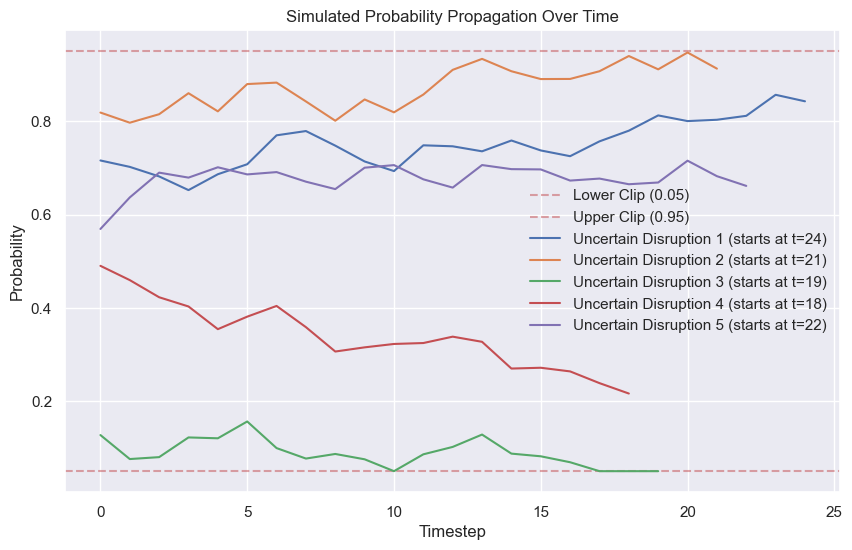

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid')

# Initialize parameters
n_positions = 5  # Number of starting positions 
n_timesteps = 25  # Number of timesteps
start_probs = np.random.uniform(0.1, 0.9, n_positions)  # Random initial probabilities
stop_timesteps = np.random.randint(n_timesteps/2, n_timesteps, n_positions)  # Random stop points

# Function to propagate probabilities over time
def propagate_probabilities(start_probs, n_timesteps, stop_timesteps):
    probabilities = [start_probs]
    for t in range(1, n_timesteps):
        current_probs = probabilities[-1].copy()
        new_probs = []
        for i, prob in enumerate(current_probs):
            if t <= stop_timesteps[i]:
                random_variation = np.random.uniform(-0.05, 0.05)  # Random adjustment
                bias = 0.05 * (1 - prob) if prob > 0.5 else -0.05 * prob  # Bias toward extremes
                progression = random_variation + bias
                new_prob = prob + progression
                new_prob = max(0.05, min(0.95, new_prob))  # Cap probabilities
            else:
                new_prob = np.nan  # Use nan after stop point
            new_probs.append(new_prob)
        probabilities.append(new_probs)
    return np.array(probabilities)

# Generate probability progression
prob_progression = propagate_probabilities(start_probs, n_timesteps, stop_timesteps)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot clip lines
plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.5, label='Lower Clip (0.05)')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='Upper Clip (0.95)')

# Plot probability progressions
for i in range(n_positions):
    # Only plot non-nan values
    data = prob_progression[:, i]
    timesteps = range(n_timesteps)
    plt.plot(timesteps, data, 
             label=f"Uncertain Disruption {i+1} (starts at t={stop_timesteps[i]})")

plt.xlabel("Timestep")
plt.ylabel("Probability")
plt.title("Simulated Probability Propagation Over Time")
plt.legend(frameon=False)
plt.grid(True)
plt.show()
